We begin this assignment by import the necessary libraries.

In [35]:
import numpy as np
from matplotlib import pyplot as plt

Question 1

Here we load the 'pulses.csv' file into a numpy array and print the contents. See file: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

In [49]:
def load_contents(filename, print_contents=True):
    """ Loads a file using the np.loadtxt, with options to print the contents. Loads the content as floats """
    pulse_contents = np.loadtxt(filename, delimiter=',', dtype=float)
    if print_contents:
        print(pulse_contents)
    
    return pulse_contents

pulse_contents = load_contents('./pulses.csv')


[[9.50846407e+10 1.59900000e+03 1.59600000e+03 ... 1.59600000e+03
  1.59700000e+03 1.59700000e+03]
 [9.50870527e+10 1.59900000e+03 1.60000000e+03 ... 1.58600000e+03
  1.58500000e+03 1.58700000e+03]
 [9.50887736e+10 1.59900000e+03 1.59400000e+03 ... 1.59700000e+03
  1.59700000e+03 1.59400000e+03]
 ...
 [9.65698175e+10 1.59900000e+03 1.59700000e+03 ... 1.59100000e+03
  1.59100000e+03 1.59200000e+03]
 [9.65703669e+10 1.59800000e+03 1.59800000e+03 ... 1.55400000e+03
  1.55500000e+03 1.55100000e+03]
 [9.65750806e+10 1.59900000e+03 1.60100000e+03 ... 1.56000000e+03
  1.55800000e+03 1.55700000e+03]]


Question 2

Now we convert the readings to voltages using a given formula

In [37]:
def readings_to_voltages(readings, print_voltages=True):
    """ Converts the readings to voltages with the option of printing the results """
    # Extract the ADC readings from the loaded data
    adc_readings = pulse_contents[:, 1:]

    # Convert to voltages
    voltages = adc_readings / (2**10 - 1) * 0.6

    if print_voltages:
        print(voltages)

    return voltages

voltages = readings_to_voltages(pulse_contents)

[[0.93782991 0.93607038 0.93782991 ... 0.93607038 0.93665689 0.93665689]
 [0.93782991 0.93841642 0.93782991 ... 0.93020528 0.92961877 0.93079179]
 [0.93782991 0.93489736 0.93841642 ... 0.93665689 0.93665689 0.93489736]
 ...
 [0.93782991 0.93665689 0.93782991 ... 0.93313783 0.93313783 0.93372434]
 [0.9372434  0.9372434  0.93782991 ... 0.91143695 0.91202346 0.90967742]
 [0.93782991 0.93900293 0.93841642 ... 0.91495601 0.91378299 0.91319648]]


Question 3

Here we plot a single pulse of the contents

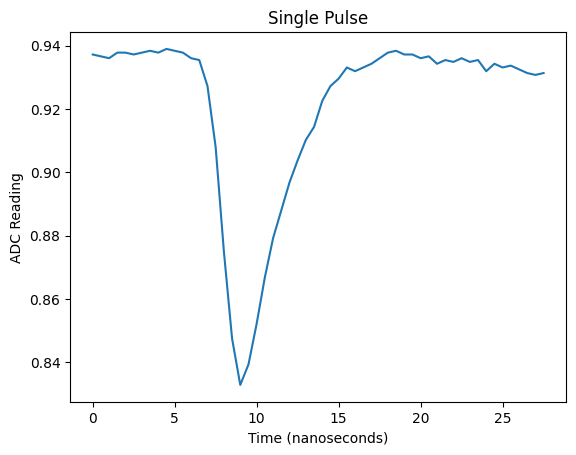

In [38]:
def plot_pulse(voltages, index):
    """ Plots a single pulse of the ADC data as voltages. The index corresponds to a row in the data. """
    pulse = voltages[index] # Extract the single pulse

    # Create a time array for the x-axis
    time = np.arange(len(pulse)) * 0.5  # Sampling interval of 0.5 nanoseconds

    # Now plot the pulse
    plt.plot(time, pulse)

    # Add labels and title
    plt.xlabel('Time (nanoseconds)')
    plt.ylabel('ADC Reading')
    plt.title('Single Pulse')

    # Display the figure
    plt.show()

    


plot_pulse(voltages=voltages, index=500)

Question 4

Here we will correct for the baseline that represents a noise level

In [44]:
def correct_baseline(voltages, print_voltages=True):
    """ Removes the baseline by calculating the mean of each pulse and subtracting it from the entire pulse. """
    # Create a copy of the voltages
    corrected_voltages = voltages.copy()
    # Iterate over all the pulses

    for i in range(len(voltages)):
        pulse = corrected_voltages[i]
        num_pulse = len(pulse)

        # Calculate the mean and subtract it
        mean = 0
        for j in range(num_pulse):
            mean += pulse[j]
            num_pulse += 1

        mean /= num_pulse
        pulse -= mean
        corrected_voltages[i] = pulse

    if print_voltages:
        print(corrected_voltages)
        
    return corrected_voltages

voltages_corrected = correct_baseline(voltages)

[[0.47684332 0.47508379 0.47684332 ... 0.47508379 0.4756703  0.4756703 ]
 [0.47804776 0.47863427 0.47804776 ... 0.47042313 0.46983661 0.47100964]
 [0.47630917 0.47337662 0.47689568 ... 0.47513615 0.47513615 0.47337662]
 ...
 [0.48310641 0.48193339 0.48310641 ... 0.47841433 0.47841433 0.47900084]
 [0.5133274  0.5133274  0.51391391 ... 0.48752095 0.48810746 0.48576142]
 [0.50454545 0.50571848 0.50513196 ... 0.48167155 0.48049853 0.47991202]]


Question 5

Here we visualize the corrected values using the plotting function we created earlier

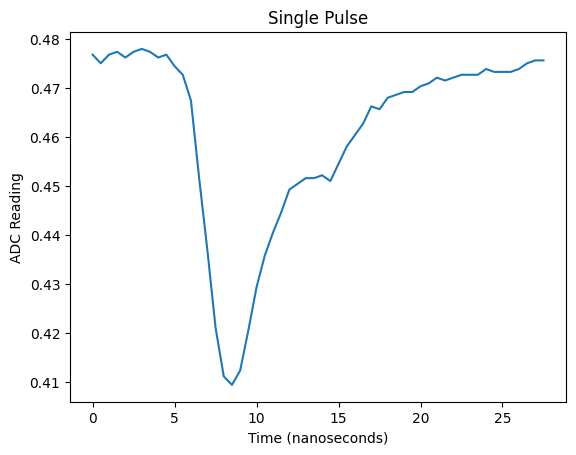

In [45]:
plot_pulse(voltages_corrected, index=0)

Question 6

Here we calculate the amplitude of the pulse and the energy deposited in the detector. Histograms of these two values are visualized showing the distribution.

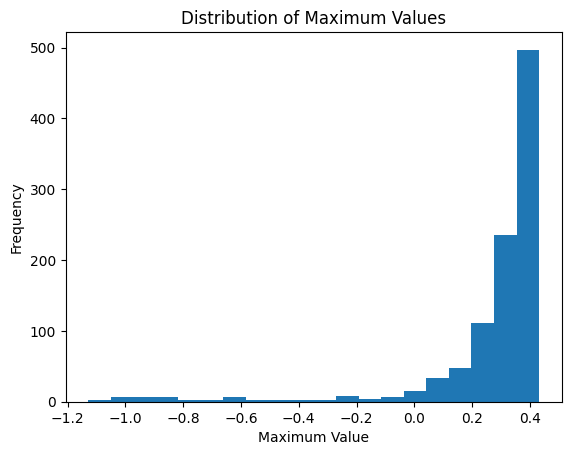

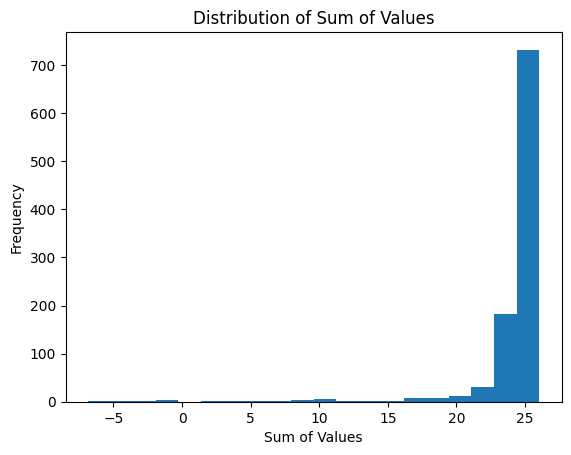

In [48]:
def temp(voltages_corrected):
    # Find the maximum value for each pulse
    max_values = np.min(voltages_corrected, axis=1)

    # Calculate the sum of values for each pulse
    sum_values = np.sum(voltages_corrected, axis=1)

    plt.hist(max_values, bins=20)
    plt.xlabel('Maximum Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Maximum Values')
    plt.show()

    # Plot histogram of the sum values
    plt.hist(sum_values, bins=20)
    plt.xlabel('Sum of Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sum of Values')
    plt.show()

temp(voltages_corrected)

As we can see the two histograms have a similar distribution. This suggests that the pulse amplitued and the energy in the detector have similar charactersitics and are consistent across the dataset. 